One-hot encoding is the most common, most basic way to turn a token into a vector.

It consists of associating a unique integer index with every word and then turning this integer index i into a binary vector of size N (the size of the vocabulary); the vector is all zeros except for the i th entry, which is 1.One-hot encoding is the most common, most basic way to turn a token into a vector.

## 6.1 Word-level one-hot encoding (toy example)

In [2]:
import numpy as np

In [3]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}

for sample in samples:

    for word in sample.split():
    
        if word not in token_index:
    
            token_index[word] = len(token_index) + 1
        
            max_length = 10
        
            results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
#print (results)

In [4]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

Enumerate is a built-in function of Python. It allows us to loop over something and have an automatic counter.  Example : 

#### my_list = ['apple', 'banana', 'grapes', 'pear']

#### for c, value in enumerate(my_list, 1): print(c, value)

Output:
1 apple
2 banana
3 grapes
4 pear

## 6.2 Character-level one-hot encoding (toy example)

In [5]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

characters = string.printable

token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50

results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))

for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i,j,index]=1

## 6.3 Using Keras for word-level one-hot encoding

In [6]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)

tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))


Found 9 unique tokens.


Keras provides the Tokenizer class for preparing text documents for deep learning. The Tokenizer must be constructed and then fit on either raw text documents or integer encoded text documents.

## 6.4 Word-level one-hot encoding with hashing trick (toy example)

In [7]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality  #Hashes the word into a random integer index between 0 and 1,000
        results[i, j, index] = 1.

Word embeddings are meant to map human language into a geometric space.

#### The Embedding layer: It’s about learning the weights of a layer.

## 6.5 Instantiating an Embedding layer

In [8]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

## 6.6 Loading the IMDB data for use with an Embedding layer

In [9]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)#bracket missing in book
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

## 6.7 Using an Embedding layer and classifier on the IMDB data

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 76us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 58us/step - loss: 

## 6.8 Processing the labels of the raw IMDB data

In [11]:
import os
imdb_dir = '/home/dalvi/Jupyter/Chapter6/aclImdb/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

## 6.9 Tokenizing the text of the raw IMDB data

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train=data[:training_samples]

y_train=labels[:training_samples]

x_val=data[training_samples: training_samples + validation_samples]

y_val=labels[training_samples: training_samples + validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


## 6.10 Parsing the GloVe word-embeddings file

In [13]:
glove_dir = '/home/dalvi/Jupyter/Chapter6/glove.6B'
embeddings_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


## 6.11 Preparing the GloVe word-embeddings matrix

In [14]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

## 6.12 Model definition

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## 6.13 Loading pretrained word embeddings into the Embedding layer

In [16]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

## 6.14 Training and evaluation

In [17]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 1.7429 - acc: 0.5350 - val_loss: 0.7694 - val_acc: 0.5057
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.5717 - acc: 0.7050 - val_loss: 0.7674 - val_acc: 0.5172
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.5775 - acc: 0.7050 - val_loss: 0.8163 - val_acc: 0.5036
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3776 - acc: 0.8400 - val_loss: 1.1213 - val_acc: 0.5087
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3086 - acc: 0.8750 - val_loss: 0.8193 - val_acc: 0.5172
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1871 - acc: 0.9550 - val_loss: 0.8800 - val_acc: 0.5318
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2333 - acc: 0.8900 - val_loss: 1.0001 - val_acc: 0.5079
Epoch 8/10
200/200 [========

## 6.15 Plotting the results

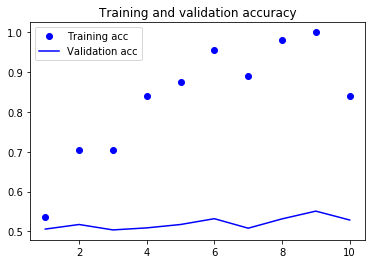

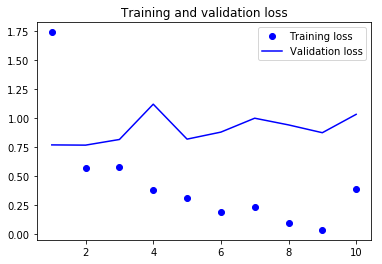

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6.16 Training the same model without pretrained word embeddings

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 0.6972 - acc: 0.4150 - val_loss: 0.6928 - val_acc: 0.5082
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5221 - a

## 6.17 Tokenizing the data of the test set

In [20]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

## 6.18 Evaluating the model on the test set

In [21]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 114us/step


[1.0497284234905242, 0.52656000000000003]

# Understanding recurrent neural networks

## 6.19 Pseudocode RNN

statet = 0
for inputt in input_sequence:
    outputt = f(inputt, statet)
    statet = outputt

## 6.20 More detailed pseudocode for the RNN

In [22]:
#state_t = 0
#for input_t in input_sequence:
#    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
#    state_t = output_t

## 6.21 Numpy implementation of a simple RNN

In [23]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

## 6.22 Preparing the IMDB data

In [24]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## 6.23 Training the model with Embedding and SimpleRNN layers

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.6469 - acc: 0.6078 - val_loss: 0.4931 - val_acc: 0.7684
Epoch 2/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.4130 - acc: 0.8205 - val_loss: 0.4671 - val_acc: 0.7848
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.3104 - acc: 0.8748 - val_loss: 0.3987 - val_acc: 0.8266
Epoch 4/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2291 - acc: 0.9132 - val_loss: 0.4368 - val_acc: 0.8112
Epoch 5/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1604 - acc: 0.9424 - val_loss: 0.3824 - val_acc: 0.8540
Epoch 6/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1064 - acc: 0.9633 - val_loss: 0.4116 - val_acc: 0.8516
Epoch 7/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.0660 - acc: 0.9788 - val_loss: 0.4785 - val_acc:

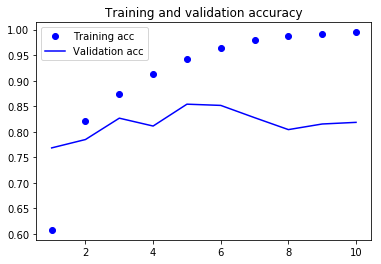

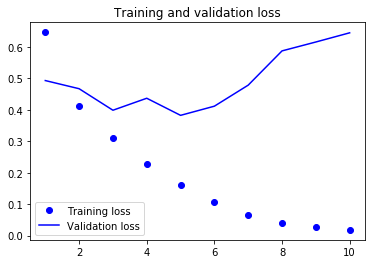

In [25]:
import matplotlib.pyplot as plt

from keras.layers import Embedding,Flatten,Dense
from keras import Sequential
from keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 6.24 Plotting results

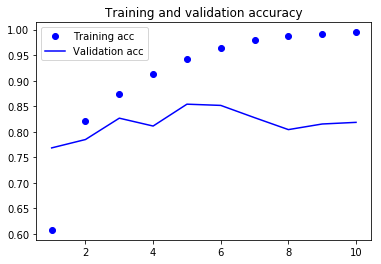

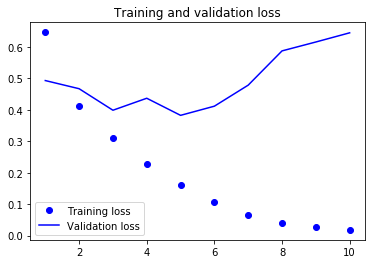

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 6.25 Pseudocode details of the LSTM architecture (1/2)

In [1]:
#y = activation(dot(state_t, U) + dot(input_t, W) + b)
#output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)
#i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
#f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
#k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

## 6.26 Pseudocode details of the LSTM architecture (2/2)

In [2]:
#c_t+1 = i_t * k_t + c_t * f_t

## 6.27 Using the LSTM layer in Keras

In [30]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 100s 5ms/step - loss: 0.5063 - acc: 0.7629 - val_loss: 0.3712 - val_acc: 0.8582
Epoch 2/10
20000/20000 [==============================] - 96s 5ms/step - loss: 0.2914 - acc: 0.8853 - val_loss: 0.2790 - val_acc: 0.8854
Epoch 3/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.2317 - acc: 0.9118 - val_loss: 0.2797 - val_acc: 0.8934
Epoch 4/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.1963 - acc: 0.9276 - val_loss: 0.6169 - val_acc: 0.8242
Epoch 5/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.1765 - acc: 0.9353 - val_loss: 0.3015 - val_acc: 0.8754
Epoch 6/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.1524 - acc: 0.9447 - val_loss: 0.3080 - val_acc: 0.8910
Epoch 7/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.1384 - acc: 0.9515 - val_loss: 0.4180 - val_acc